
1. Customer Login
2. Manager Login



Welcome Back, Manager. Please Input Your Credentials Above.

Manager Menu:
1. View Shop
2. Add Items to Shop Inventory
3. Remove Items From Shop Inventory
4. View Customers
5. Reports and History
6. Exit Manager Menu

Successfully Added APPLE To Shop Inventory.

Manager Menu:
1. View Shop
2. Add Items to Shop Inventory
3. Remove Items From Shop Inventory
4. View Customers
5. Reports and History
6. Exit Manager Menu


1. Customer Login
2. Manager Login

Hello Jeffrey, Welcome to the Grocery Store.

Menu:
1. View Shop and Add to Cart
2. Remove Items From Cart
3. Checkout

---------------------------------------------
ID    NAME            PRICE(USD)      QNT
---------------------------------------------
1     APPLE           1.0             10
---------------------------------------------
{'APPLE': 3}
Successfully Added Item To Cart

Menu:
1. View Shop and Add to Cart
2. Remove Items From Cart
3. Checkout

Total Price: 3.0

Goodbye Jeffrey, Thanks For Shopping With Us!

1. Customer Logi

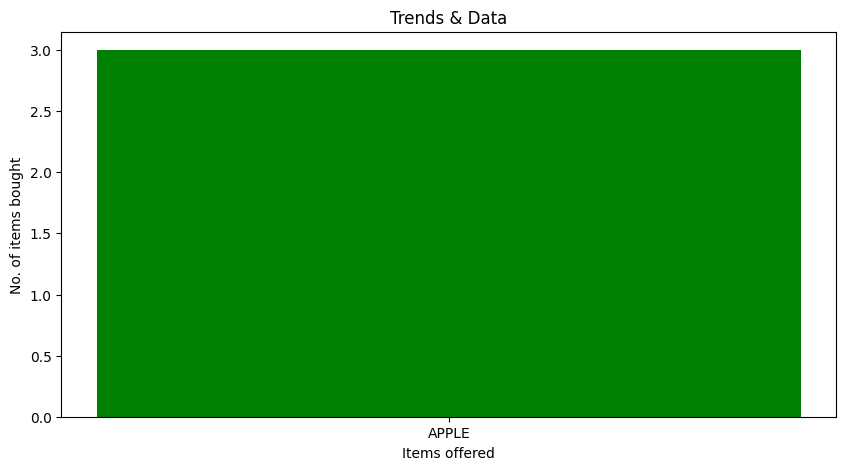


Manager Menu:
1. View Shop
2. Add Items to Shop Inventory
3. Remove Items From Shop Inventory
4. View Customers
5. Reports and History
6. Exit Manager Menu



KeyboardInterrupt: Interrupted by user

In [2]:
###-----------------------------------------------------------CUSTOMER MANAGING CLASSES-----------------------------------------------------------###
class Customer:
    def __init__(self, fname, lname, email, phone):
        self.fname=fname
        self.lname=lname
        self.email=email
        self.phone=phone

class TempCustomer:
    def __init__(self, fname):
        self.fname=fname

class CustomerManager:
    def __init__(self):
        self.users=[]
        self.tempuser=[]
    
    def add(self, customer):
        self.users.append(customer)
    
    def addtempuser(self, tempuser):
        self.tempuser.append(tempuser)

class BeginLogin:
    def __init__(self):
        self.customer=CustomerManager()

    def addnewuser(self,user):
        self.customer.add(user)
    
    def addnewtempuser(self, tempuser):
        self.customer.addtempuser(tempuser)
        
    def loginmenu(self):
        print(color.CYAN + '\n1. Customer Login\n2. Manager Login' + color.END)
    
    def managermenu(self):
        self.check_low_stock()
        print("\nManager Menu:\n1. View Shop\n2. Add Items to Shop Inventory\n3. Remove Items From Shop Inventory\n4. View Customers\n5. Reports and History\n6. Exit Manager Menu\n")

    def welcometempuser(self):
        for tempuser in self.customer.tempuser:
            print(color.BOLD + f"\nHello {tempuser.fname}, Welcome to the Grocery Store." + color.END)

    def goodbyetempuser(self):
        for tempuser in self.customer.tempuser:
            print(color.BOLD + f"\nGoodbye {tempuser.fname}, Thanks For Shopping With Us!" + color.END)
    
    def removetempuser(self):
        for tempuser in self.customer.tempuser:
            self.customer.tempuser.pop()
        
    def displaycustomers(self):
        fname="FNAME"
        lname="LNAME"
        email="EMAIL"
        phone="PHONE"
        dash='-'*80
        print(dash)
        print("\033[1m%-15s %-15s %-30s %s\033[0m"%(fname,lname,email,phone))
        print(dash)
        for user in self.customer.users:
            print("%-15s %-15s %-30s %s"%(user.fname,user.lname,user.email,user.phone))
        print(dash)

    def seesales(self):
        dash='-'*30
        print(dash)
        for user, sale in zip(self.customer.users, TEMPSALE):
            print(f"{user.fname} Made a Purchase Worth: {sale}$")
        print(dash)


    def check_low_stock(self):
        low_stock_alerts = []

        for item in self.shop.inventory.itemsininv:
            if item.stock < 5:
                low_stock_alerts.append(item)

        if low_stock_alerts:
            print(color.RED + '\nLow Stock Alerts:' + color.END)
            for item in low_stock_alerts:
                print(f"{item.name} (ID: {item.id}) - Quantity Left: {item.stock}")

###-----------------------------------------------------------LOGIN SEQUENCE DOWN HERE(CUSTOMER WILL BE TAKEN TO SHOPPING SEQUENCE)-----------------------------------------------------------###
    def loginsequence(self):
        self.shop=GroceryStore()
        self.inventory=Inventory()
        while True:
            self.loginmenu()
            choice=input("Type In Corresponding Number:")

            if choice=="1":
                fname=input("Type Your First Name")
                lname=input("Type Your Last Name")
                global email
                email=input("Type Your Email")
                phone=input("Type Your Phone Number")
                user=Customer(fname,lname,email,phone)
                tempuser=TempCustomer(fname)

                self.addnewuser(user)
                self.addnewtempuser(tempuser)
                self.welcometempuser()
                
                self.shop.shoppingsequence()

            elif choice=="2":
                print("\nWelcome Back, Manager. Please Input Your Credentials Above.")
                username=input("Please Type In Username")
                password=input("Please Type In Password")
                
                if username==("ADMIN") and password==("12345"):
                    originalmenu=0
                    while originalmenu==0:
                        self.managermenu()
                        managerchoice=input("Type In Corresponding Number:")
                        menu=0
                        while menu==0:

                            if managerchoice=="1":
                                self.shop.displayitemsinstore()
                                menu=1

                            if managerchoice=="2":
                                doneadding=0

                                while doneadding==0:
                                    addtoinvchoice=input("Do You Want To Add New Items? Type YES To Continue Or DONE To Stop Adding.")

                                    if addtoinvchoice==("YES"):
                                        id=input("Type The ID Of The Product")
                                        i=str(id)
                                        if i in TEMPORARYID:
                                            print("\nID Already Taken. Please Chose Another")
                                            print("HINT: Last ID Used Was",TEMPORARYID[-1])
                                            print("TAKEN IDs:",TEMPORARYID[::],"\n")
                                        else:
                                            self.shop.addtempid(id)
                                            name=input("Type The Name Of The Product.")
                                            price=input("Type The Price Of The Product.")
                                            stock=input("Type The Available Stock Of The Product.")                             
                                            item=Product(id, name, price, stock)
                                            self.shop.addtostore(item)
                                            print(f"Successfully Added {item.name} To Shop Inventory.")
                                            

                                    elif addtoinvchoice==("DONE"):
                                        doneadding=1
                            
                            if managerchoice=="3":
                                doneremoving=0

                                while doneremoving==0:
                                    removefrominvchoice=input("Do You Want To Remove Items? Type YES To Continue or DONE To Stop Removing.")

                                    if removefrominvchoice==("YES"):
                                        self.shop.displayitemsinstore()
                                        itemid=input("Type The ID Of The Product You Would Like To Remove")
                                        item=Product(itemid, name, price,stock)
                                        z=str(itemid)
                                        if itemid in TEMPORARYID:
                                            if self.shop.removefromstore(itemid):
                                                print("Successfully Removed Item From Inventory.")
                                                self.shop.removetempid(str(itemid))
                                            else:
                                                print("No Such ID Available.")
                                        else:
                                            print("No Such ID Available.")

                                    elif removefrominvchoice==("DONE"):
                                        doneremoving=1

                            if managerchoice=="4":
                                self.displaycustomers()     
                                menu=1
                            
                            if managerchoice=="5":
                                self.seesales()
                                self.shop.seeplot()
                                menu=1

                            if managerchoice=="6":
                                originalmenu=1
                            break
                else:
                    print("INVALID USERNAME OR PASSWORD")

            #break

###-----------------------------------------------------------INVENTORY AND PRODUCT CLASSES-----------------------------------------------------------###
class Product:
    def __init__(self, id, name, price, stock):
        self.id=id
        self.name=name
        self.price=float(price)
        self.stock=int(stock)

TEMPORARYID=[]
class Inventory:
    
    def __init__(self):
        self.itemsininv=[]
    
    def addtoinv(self, item):
        self.itemsininv.append(item)
    
    def removes(self, itemid):
        for item in self.itemsininv:
            if item.id == itemid:
                self.itemsininv.remove(item)
                return True
        return False
    
    def tempid(self, id):
        TEMPORARYID.append(str(id))

    def byebyetempid(self, id):
        for id in TEMPORARYID:
            TEMPORARYID.remove(str(id))

    def getitem(self, item_id):
        for item in self.itemsininv:
            if item.id == item_id:
                return item
        return None

class CartItem:
    def __init__(self, iden, product, quantity):
        self.iden=iden
        self.product=product
        self.quantity=quantity
    
class ShoppingCart:
    def __init__(self):
        self.itemsincart = []

    def addtocart(self, iden, product, quantity):
        self.itemsincart.append(CartItem(iden, product, quantity))

    def removefromcart(self, productid, quantity):
        for item in self.itemsincart:
            if item.product.id == productid:
                if item.quantity <= quantity:
                    self.itemsincart.remove(item)
                    return item.quantity
                else:
                    item.quantity -= quantity
                    return quantity
        return 0
    
    def clearcart(self):
        self.itemsincart.clear()

    def clearreceipt(self): ##VALUES FOR RECEIPTS ONLY.
        ITEMS.clear()
        QUANTS.clear()
        PRICE.clear()

    def totalprice(self):
        total = 0
        for item in self.itemsincart:
            total += (item.product.price * item.quantity)
        return total

    def addtempsale(self, totalsale):
        TEMPSALE.append(totalsale)

ITEMS=[]
QUANTS=[]
PRICE=[]
TEMPSALE=[]
##receipts print values only from lists. can't pull them out of functions unfortunately :(

class GroceryStore:
    def __init__(self):
        self.inventory=Inventory()
        self.cart=ShoppingCart()
        self.plot={}
    
    def addtostore(self, item):
        self.inventory.addtoinv(item)
    
    def removefromstore(self, itemid):
        return self.inventory.removes(itemid)

    def returntostore(self, productid, quantity):
        item = self.inventory.getitem(productid)
        if item:
            item.stock += quantity
    
    def addtempid(self, id):
        self.inventory.tempid(str(id))
    
    def removetempid(self, id):
        self.inventory.byebyetempid(str(id))

    def shoppingmenu(self):
        print("\nMenu:\n1. View Shop and Add to Cart\n2. Remove Items From Cart\n3. Checkout")
    
    def displayitemsinstore(self):
        id="ID"
        name="NAME"
        price="PRICE(USD)"
        stock="QNT"
        dash='-'*45
        print()
        print(dash)
        print("\033[1m%-5s %-15s %-15s %s\033[0m"%(id,name,price,stock))
        print(dash)
        for item in self.inventory.itemsininv:
            print("%-5s %-15s %-15s %s"%(item.id,item.name,item.price,item.stock))
        print(dash)

    def displayitemsincart(self):
        iden="ID"
        name="NAME"
        price="PRICE(USD)"
        quantity="QNT"
        dash='-'*45
        print()
        print(dash)
        print("\033[1m%-5s %-15s %s\033[0m"%(iden,name,quantity))
        print(dash)
        for item in self.cart.itemsincart:
            print("%-5s %-15s %s"%(item.iden,item.product.name,item.quantity))
        print(dash)

    def getitem(self, itemid):
        for item in self.inventory.itemsininv:
            if item.id == itemid:
                return item
        return None

    def receipt_items(self):
        for index, item in enumerate(self.cart.itemsincart):
            print(f"{index + 1}. {item.name}")
    def receipt_quantity(self):
        for index, item in enumerate(self.cart.items):
            print(f"{index+1} {item.quantity}")     
###-----------------------------------------------------------PDF RECEIPT CODE-----------------------------------------------------------###
    def printreceipt(self):
        sumquant=sum(QUANTS)
        lebanese=self.cart.totalprice()*90000
        page=FPDF()
        page.add_page()
        page.set_font('Arial','B',28)
        page.cell(190,10,"The Gorcery Store",0,1,'C')
        page.ln(h = '')

        page.set_font('Arial','',16)
        page.cell(190, 3, 'Notre Dame University',0,1,'C')
        page.ln(h = '')

        page.set_font('Arial','',16)
        page.cell(190, 5, '-LOUAIZE-',0,1,'C')
        page.ln(h = '')

        page.set_font('Arial','',16)
        page.cell(190, 5, str(today.month)+"/"+str(today.day)+"/"+str(today.year)+"   |   "+str(t),0,1,'C')
        page.ln(h = '')
        page.ln(h = '')
        page.ln(h = '')

        page.set_font('Arial','B',14)
        page.cell(190, 5, 'ID#                      ITEM                                                  QUANTITY          PRICE(USD)')
        page.ln(h = '')
        page.cell(190, 8, '____________________________________________________________________')
        page.ln(h = '')
        page.set_font('Arial','',12)
        for x in range(len(ITEMS)):
            page.cell(39,5,str(x+1)+'#',1)
            page.cell(80,5,str(ITEMS[x]),1)
            page.cell(39,5,str(QUANTS[x]),1)
            page.cell(30,5,str(PRICE[x]),1)
            page.ln(h = '')
        page.set_font('Arial','B',14)
        page.cell(190, 8, '____________________________________________________________________')
        page.ln(h = '')
        page.set_font('Arial','B''U',14)
        page.cell(145,5,'|TOTAL SALES: '+str(self.cart.totalprice())+' USD')
        page.cell(90, 5, '|TOTAL QTY: '+str(sumquant))
        page.ln(h = '')
        page.set_font('Arial','',10)
        page.cell(130,5,'USD rate: 90.000 lbp')
        page.ln(h = '')
        page.ln(h = '')
        page.set_font('Arial','B''U',14)
        page.cell(130,5,'|ALTERNATIVE SALE: '+str(lebanese)+' LBP')
        page.ln(h = '')
        page.ln(h = '')
        page.ln(h = '')

        page.set_font('Arial','',16)
        page.cell(190, 5, 'THANK YOU',0,1,'C')  
        page.cell(190, 5, 'HAVE A NICE DAY',0,1,'C')      
        
        
        page.output('Receipt.pdf','F')

    def addtoplot(self,key,value):
        self.plot[key]=value
    
    def updateplot(self, key, newvalue):
        self.plot[key]=newvalue
    
    def seeplot(self):
        items = list(self.plot.keys())
        quants = list(self.plot.values())

        fig = plt.figure(figsize = (10, 5))

        plt.bar(items, quants, color ='green', 
                width = 0.4)

        plt.xlabel("Items offered")
        plt.ylabel("No. of items bought")
        plt.title("Trends & Data")
        plt.show()

###-----------------------------------------------------------SHOPPING SEQUENCE FOR USER BEGINS DOWN HERE-----------------------------------------------------------###
    def shoppingsequence(self):
        
        bigmenu=0
        while bigmenu==0:
            self.shoppingmenu()
            choice=input("Type In Corresponding Number:")

            loopingmenu=0
            while loopingmenu==0:
            
                if choice=="1":
                    self.displayitemsinstore()

                    doneaddingtocart=0
                    while doneaddingtocart==0:
                        addtocartchoice = input("Do You Want To Add Items To Your Cart? Type YES To Continue Or DONE To Stop Adding.")

                        if addtocartchoice=="YES":
                            productid = input("Type The ID Of The Item You'd Like To Add To Your Cart: ")

                            item = self.getitem(productid)
                            if item:
                                quantity = int(input("Type The Quantity Of The Product: "))

                                if int(item.stock) >= quantity:
                                    self.cart.addtocart(productid, item, quantity)

                                    ITEMS.append(item.name)
                                    QUANTS.append(int(quantity))
                                    PRICE.append(item.price)
                                    self.addtoplot(item.name,quantity)
                                    print("Successfully Added Item To Cart")
                                    item.stock -= quantity
                                    
                                else:
                                    print("Invalid Quantity or Insufficient Stock.")

                            else:
                                print("No Such ID Available.")

                        elif addtocartchoice == "DONE":
                            doneaddingtocart=1
                            
                if choice=="2":
                    self.displayitemsincart()

                    doneremoving=0
                    while doneremoving==0:
                        removefromcartchoice = input("Do You Want To Remove Items From Your Cart? Type YES To Continue Or DONE To Stop Removing: ")

                        if removefromcartchoice=="YES":
                            productiden = input("Type The ID Of The Item You'd Like To Remove From Your Cart: ")
                            productquant = int(input("Type The Quantity To Remove From Said Product: "))
                            removedquant = self.cart.removefromcart(productiden, productquant)
                            removedquantforplot=quantity-productquant

                            if removedquant>0:
                                self.returntostore(productiden, removedquant)
                                
                                ITEMS.remove(item.name)
                                QUANTS.remove(int(quantity))
                                PRICE.remove(item.price)

                                item = self.inventory.getitem(productiden)
                                self.updateplot(item.name, removedquantforplot)

                                print("Successfully Removed Item From Cart")
                            
                            else:
                                print("Invalid Quantity or Item Not Found in Cart.")
                        
                        elif removefromcartchoice=="DONE":
                            doneremoving=1
                            

                if choice=="3":

                    print("\nTotal Price:", self.cart.totalprice())
                    totalsale=self.cart.totalprice()
                    self.cart.addtempsale(int(totalsale))
                    #print(TEMPSALE)

                    self.printreceipt()
###-----------------------------------------------------------EMAIL RECEIPT CODE-----------------------------------------------------------###
                    email_sender = 'chlorophyllconsumer@gmail.com'
                    email_password = 'mxaj imnt eabl ytca'
                    email_receiver = email

                    subject = 'Your Recent Invoice'
                    body = """

                    Thank You For shopping With Us.
                    YOU HAVE BEEN SERVED BY: Jeffrey
                    
                    """

                    em = EmailMessage()
                    em['From'] = email_sender
                    em['To'] = email_receiver
                    em['Subject'] = subject
                    em.set_content(body)
                    
                    em.add_alternative(body, subtype='html')

                    with open('Receipt.pdf','rb') as attachment_file:
                        file_data= attachment_file.read()
                        file_name= attachment_file.name.split("/")[-1]

                    attachment = MIMEBase('application', f'octet-stream')
                    attachment.set_payload(file_data)
                    encoders.encode_base64(attachment)
                    attachment.add_header('Content-Disposition', f'attachment; filename="{file_name}"')
                    em.attach(attachment)

                    context = ssl.create_default_context()

                    with smtplib.SMTP_SSL('smtp.gmail.com', 465, context = context) as smtp:
                        smtp.login(email_sender, email_password)
                        smtp.sendmail(email_sender, email_receiver, em.as_string())         
                    
                    self.cart.clearcart()
                    self.cart.clearreceipt()
                    beginmanaging.goodbyetempuser()
                    beginmanaging.removetempuser()
                    bigmenu=1               
                break

###-----------------------------------------------------------LIBRARIES AND DEPENDENCIES-----------------------------------------------------------###
from datetime import date
today = date.today()
from datetime import datetime
now = datetime.now()
t = now.strftime("%H:%M:%S")

from fpdf import FPDF
import os

from email.message import EmailMessage
import ssl
import smtplib
from email.mime.base import MIMEBase
from email import encoders

import numpy as np
import matplotlib.pyplot as plt 


###-----------------------------------------------------------COLOR CLASS FOR OUTPUTS--------------------------------------------------------------###
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

###---------------------------------------------------------------CODE BEGINS HERE-----------------------------------------------------------------###
if __name__ == "__main__":
    beginmanaging = BeginLogin()
    beginmanaging.loginsequence()